In [1]:
import json
import seaborn as sns

with open('results_leading.json', 'r') as fd:
    leading = json.load(fd)
    
with open('results_middle.json', 'r') as fd:
    middle = json.load(fd)
    
with open('results_none.json', 'r') as fd:
    tr_results = json.load(fd)
    
with open('results_single.json', 'r') as fd:
    single = json.load(fd)
    

In [2]:
def get_measures(method):
    ret = {}
    for index,out in method.items():
        euc = []
        cos = []
        ret[index] = {}
        for key,value in out.items():
            if key == 'new_words':
                ret[index]['new'] = len(value)
            elif key == 'retired_words':
                ret[index]['retired'] = len(value)
            else:
                euc.append(value['euclidean'])
                cos.append(value['cosine'])

        ret[index]['euc'] = euc
        ret[index]['cos'] = cos
    return ret


In [3]:
# Want to see top 10 changed words in 62, 63, 65, 66, 67, 71, 73, 94, and 95 and
# their top 10 most similar in those models
from gensim.models import KeyedVectors

def get_changed_words(index):
    results = leading[str(index)]
    scores = [(key,value['cosine']) for key,value in results.items() if key != 'new_words' and key != 'retired_words']
    scores.sort(key=lambda entry: entry[1])
    most_changed = [entry[0] for entry in scores[:10]]
    model = KeyedVectors.load_word2vec_format('models/vectors_leading_{}.word2vec'.format(index))
    ret = {}
    for word in most_changed:
        most_similar = []
        for entry in model.similar_by_word(word):
            if entry[0] in results['new_words']:
                most_similar.append('{}*'.format(entry[0]))
            else:
                most_similar.append(entry[0])
        ret[word] = most_similar
    return ret

In [8]:
get_changed_words(84)

{'vaccination': ['poliomyelitis',
  'expectant',
  'vaccine',
  'immunization',
  'polio',
  'vaccinated',
  'vaccinations*',
  'brucellosiseradication*',
  'mothers',
  'inoculations*'],
 'dollarayear': ['woc*',
  'smelting',
  'loaning',
  'gowns*',
  'intimates',
  'highranking',
  'nonpayment',
  'reconverting',
  'hollyday',
  'termed'],
 'chocolate': ['drinkers*',
  'packaged',
  'experimentally',
  'nutritious',
  'fluid',
  'consumption',
  'mixes',
  'longhorn*',
  'familyunit*',
  'drinks'],
 'conduit': ['ouray',
  'facilties*',
  'mallonee',
  'classing',
  'albacore',
  'manassas',
  'raced*',
  'otero',
  'entrepreneur*',
  'ditching*'],
 'burner': ['delivery',
  'cubic',
  'wellhead',
  'parachuted',
  'shortton*',
  'caldron*',
  'winnipeg',
  'jelly',
  'upto*',
  'ipana'],
 'rubinstein': ['gerardo',
  'pointi',
  'kortschok',
  'epileptic*',
  '<unk>',
  'cresse',
  'nicolo*',
  'ribbentrop',
  'shih',
  'lincolnton*'],
 'sill': ['artillery',
  'refuge',
  'guidedmissi

In [4]:
mi = get_measures(middle)
l = get_measures(leading)
t = get_measures(tr_results)
si = get_measures(single)

In [5]:
import statistics
import numpy as np
import matplotlib 
from matplotlib import pyplot as plt
import random

indices = []
means = []
sigmas = []
pct_under = []
novel = []
retired = []

for index,values in l.items():
    novel.append(values['new'])
    retired.append(values['retired'])
    sampled = random.sample(values['cos'], 10000)
    me = statistics.mean(sampled)
    sig = statistics.stdev(sampled)
    indices.append(int(index))
    n = sum(map(lambda x: x < 0.4, sampled))
    pct_under.append(100.0 * n / len(sampled))
    means.append(me)
    sigmas.append(sig)

21636


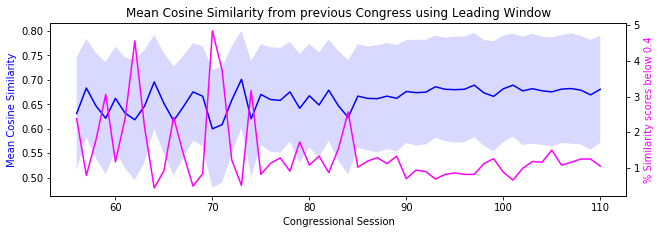

In [7]:
print(len(l['56']['cos']))
m = np.array(means)
s = np.array(sigmas)
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, m, color='blue')
ax0.fill_between(indices, m+s, m-s, facecolor='blue', alpha=0.15)
ax1.plot(indices, pct_under, color='fuchsia')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Mean Cosine Similarity', color='b')
ax1.set_ylabel('% Similarity scores below 0.4', color='fuchsia')
ax0.set_title('Mean Cosine Similarity from previous Congress using Leading Window')

plt.savefig('leading-no-event.pdf', bbox_inches='tight')

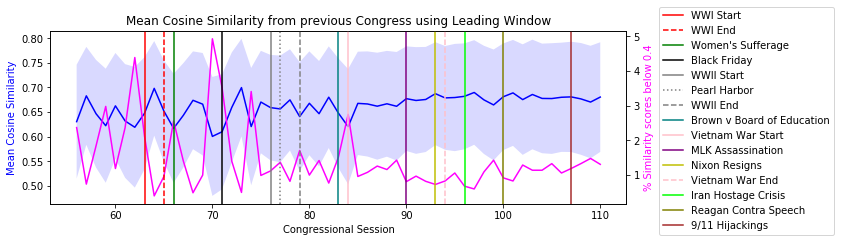

In [33]:
m = np.array(means)
s = np.array(sigmas)
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, m, color='blue')
ax0.fill_between(indices, m+s, m-s, facecolor='blue', alpha=0.15)
ax1.plot(indices, pct_under, color='fuchsia')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Mean Cosine Similarity', color='b')
ax1.set_ylabel('% Similarity scores below 0.4', color='fuchsia')
ax0.set_title('Mean Cosine Similarity from previous Congress using Leading Window')
plt.axvline(x=63, label='WWI Start', c='r')
plt.axvline(x=65, label='WWI End', linestyle='--', c='r')
plt.axvline(x=66, label="Women's Sufferage", c='g')
plt.axvline(x=71, label='Black Friday', c='black')
plt.axvline(x=76, label="WWII Start", c='grey')
plt.axvline(x=77, label='Pearl Harbor', c='grey', linestyle=':')
plt.axvline(x=79, label='WWII End', c='grey', linestyle='--')
plt.axvline(x=83, label='Brown v Board of Education', c='teal')
plt.axvline(x=84, label='Vietnam War Start', c='pink')
plt.axvline(x=90, label='MLK Assassination', c='purple')
plt.axvline(x=93, label='Nixon Resigns', c='y')
plt.axvline(x=94, label='Vietnam War End', c='pink', linestyle='--')
plt.axvline(x=96, label='Iran Hostage Crisis', c='lime')
plt.axvline(x=100, label='Reagan Contra Speech', c='olive')
plt.axvline(x=107, label='9/11 Hijackings', c='brown')

plt.legend(loc='center right', bbox_to_anchor=(1.36, 0.48), borderaxespad=0.)
plt.savefig('leading-events.pdf', bbox_inches='tight')

Present top n changed words for each pink peak

try sampling overlap to ensure sample size isn't dampening change metrics in later congress

NOTE POST-HOC reasoning in write up

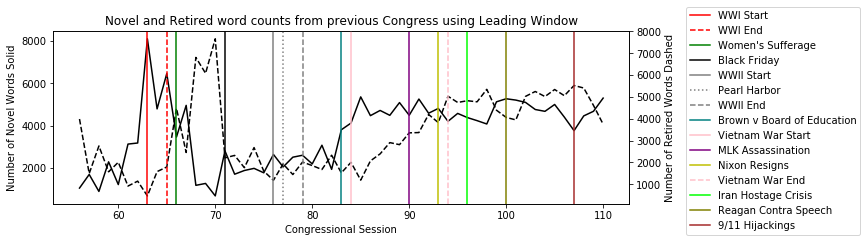

In [15]:
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, novel, color='black')
ax1.plot(indices, retired, color='black', linestyle='--')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Number of Novel Words Solid')
ax1.set_ylabel('Number of Retired Words Dashed')
ax0.set_title('Novel and Retired word counts from previous Congress using Leading Window')
plt.axvline(x=63, label='WWI Start', c='r')
plt.axvline(x=65, label='WWI End', linestyle='--', c='r')
plt.axvline(x=66, label="Women's Sufferage", c='g')
plt.axvline(x=71, label='Black Friday', c='black')
plt.axvline(x=76, label="WWII Start", c='grey')
plt.axvline(x=77, label='Pearl Harbor', c='grey', linestyle=':')
plt.axvline(x=79, label='WWII End', c='grey', linestyle='--')
plt.axvline(x=83, label='Brown v Board of Education', c='teal')
plt.axvline(x=84, label='Vietnam War Start', c='pink')
plt.axvline(x=90, label='MLK Assassination', c='purple')
plt.axvline(x=93, label='Nixon Resigns', c='y')
plt.axvline(x=94, label='Vietnam War End', c='pink', linestyle='--')
plt.axvline(x=96, label='Iran Hostage Crisis', c='lime')
plt.axvline(x=100, label='Reagan Contra Speech', c='olive')
plt.axvline(x=107, label='9/11 Hijackings', c='brown')

plt.legend(loc='center right', bbox_to_anchor=(1.41, 0.48))
plt.savefig('new-retired.pdf', bbox_inches='tight')

In [26]:
indices = []
means = []
sigmas = []
pct_under = []
novel = []
retired = []

for index,values in si.items():
    novel.append(values['new'])
    retired.append(values['retired'])
    me = statistics.mean(values['cos'])
    sig = statistics.stdev(values['cos'])
    indices.append(int(index))
    n = sum(map(lambda x: x < 0.4, values['cos']))
    pct_under.append(100.0 * n / len(values['cos']))
    means.append(me)
    sigmas.append(sig)

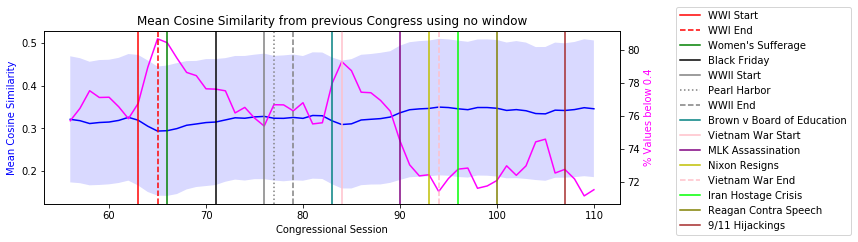

In [27]:
m = np.array(means)
s = np.array(sigmas)
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, m, color='blue')
ax0.fill_between(indices, m+s, m-s, facecolor='blue', alpha=0.15)
ax1.plot(indices, pct_under, color='fuchsia')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Mean Cosine Similarity', color='b')
ax1.set_ylabel('% Values below 0.4', color='fuchsia')
ax0.set_title('Mean Cosine Similarity from previous Congress using no window')
plt.axvline(x=63, label='WWI Start', c='r')
plt.axvline(x=65, label='WWI End', linestyle='--', c='r')
plt.axvline(x=66, label="Women's Sufferage", c='g')
plt.axvline(x=71, label='Black Friday', c='black')
plt.axvline(x=76, label="WWII Start", c='grey')
plt.axvline(x=77, label='Pearl Harbor', c='grey', linestyle=':')
plt.axvline(x=79, label='WWII End', c='grey', linestyle='--')
plt.axvline(x=83, label='Brown v Board of Education', c='teal')
plt.axvline(x=84, label='Vietnam War Start', c='pink')
plt.axvline(x=90, label='MLK Assassination', c='purple')
plt.axvline(x=93, label='Nixon Resigns', c='y')
plt.axvline(x=94, label='Vietnam War End', c='pink', linestyle='--')
plt.axvline(x=96, label='Iran Hostage Crisis', c='lime')
plt.axvline(x=100, label='Reagan Contra Speech', c='olive')
plt.axvline(x=107, label='9/11 Hijackings', c='brown')

plt.legend(loc='center right', bbox_to_anchor=(1.41, 0.48))
plt.savefig('single-events.pdf', bbox_inches='tight')

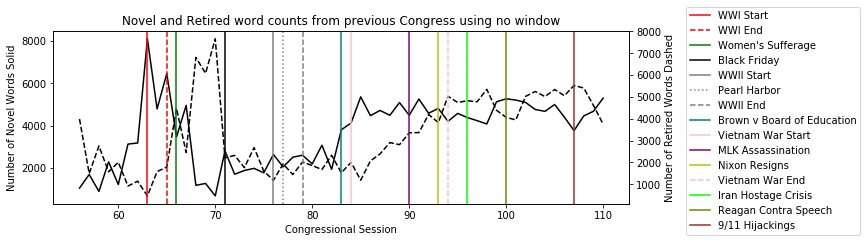

In [24]:
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, novel, color='black')
ax1.plot(indices, retired, color='black', linestyle='--')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Number of Novel Words Solid')
ax1.set_ylabel('Number of Retired Words Dashed')
ax0.set_title('Novel and Retired word counts from previous Congress using no window')
plt.axvline(x=63, label='WWI Start', c='r')
plt.axvline(x=65, label='WWI End', linestyle='--', c='r')
plt.axvline(x=66, label="Women's Sufferage", c='g')
plt.axvline(x=71, label='Black Friday', c='black')
plt.axvline(x=76, label="WWII Start", c='grey')
plt.axvline(x=77, label='Pearl Harbor', c='grey', linestyle=':')
plt.axvline(x=79, label='WWII End', c='grey', linestyle='--')
plt.axvline(x=83, label='Brown v Board of Education', c='teal')
plt.axvline(x=84, label='Vietnam War Start', c='pink')
plt.axvline(x=90, label='MLK Assassination', c='purple')
plt.axvline(x=93, label='Nixon Resigns', c='y')
plt.axvline(x=94, label='Vietnam War End', c='pink', linestyle='--')
plt.axvline(x=96, label='Iran Hostage Crisis', c='lime')
plt.axvline(x=100, label='Reagan Contra Speech', c='olive')
plt.axvline(x=107, label='9/11 Hijackings', c='brown')

plt.legend(loc='center right', bbox_to_anchor=(1.41, 0.48))

In [19]:
indices = []
means = []
sigmas = []
pct_under = []

for index,values in si.items():
    indices.append(int(index))
    n = sum(map(lambda x: x < 0.35, values['cos']))
    pct_under.append(n / len(values['cos']))
    means.append(statistics.mean(values['cos']))
    sigmas.append(statistics.stdev(values['cos']))



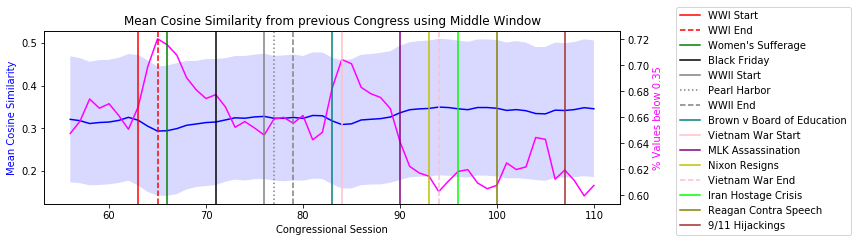

In [20]:
m = np.array(means)
s = np.array(sigmas)
fig = plt.figure(figsize=(10,3))
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1 = ax0.twinx()
ax0.plot(indices, m, color='blue')
ax0.fill_between(indices, m+s, m-s, facecolor='blue', alpha=0.15)
ax1.plot(indices, pct_under, color='fuchsia')
ax0.set_xlabel('Congressional Session')
ax0.set_ylabel('Mean Cosine Similarity', color='b')
ax1.set_ylabel('% Values below 0.35', color='fuchsia')
ax0.set_title('Mean Cosine Similarity from previous Congress using Middle Window')
plt.axvline(x=63, label='WWI Start', c='r')
plt.axvline(x=65, label='WWI End', linestyle='--', c='r')
plt.axvline(x=66, label="Women's Sufferage", c='g')
plt.axvline(x=71, label='Black Friday', c='black')
plt.axvline(x=76, label="WWII Start", c='grey')
plt.axvline(x=77, label='Pearl Harbor', c='grey', linestyle=':')
plt.axvline(x=79, label='WWII End', c='grey', linestyle='--')
plt.axvline(x=83, label='Brown v Board of Education', c='teal')
plt.axvline(x=84, label='Vietnam War Start', c='pink')
plt.axvline(x=90, label='MLK Assassination', c='purple')
plt.axvline(x=93, label='Nixon Resigns', c='y')
plt.axvline(x=94, label='Vietnam War End', c='pink', linestyle='--')
plt.axvline(x=96, label='Iran Hostage Crisis', c='lime')
plt.axvline(x=100, label='Reagan Contra Speech', c='olive')
plt.axvline(x=107, label='9/11 Hijackings', c='brown')

plt.legend(loc='center right', bbox_to_anchor=(1.41, 0.48))